# Death Dataset Exploration
## by Mostafa Ahmed

> This dataset is about abnormal death information of America

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
from matplotlib import cm

%matplotlib inline

## Preliminary Wrangling

## Gathering

In [3]:
df = pd.read_csv("Death data.csv")

## Assessing

In [3]:
df

,day,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED
...,...,...,...,...,...,...,...,...,...,...,...
100793,100794,2014,12,Homicide,0,M,36.0,Black,100,Home,HS/GED
100794,100795,2014,12,Homicide,0,M,19.0,Black,100,Street,HS/GED
100795,100796,2014,12,Homicide,0,M,20.0,Black,100,Street,HS/GED
100796,100797,2014,12,Homicide,0,M,22.0,Hispanic,260,Street,Less than HS


In [4]:
df.shape

(100798, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   day        100798 non-null  int64  
 1   year       100798 non-null  int64  
 2   month      100798 non-null  int64  
 3   intent     100797 non-null  object 
 4   police     100798 non-null  int64  
 5   sex        100798 non-null  object 
 6   age        100780 non-null  float64
 7   race       100798 non-null  object 
 8   hispanic   100798 non-null  int64  
 9   place      99414 non-null   object 
 10  education  99376 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 8.5+ MB


In [6]:
df["month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [7]:
df["day"].unique()

array([     1,      2,      3, ..., 100796, 100797, 100798], dtype=int64)

### Quality Issues
- column hispanic does not make sense
- day column does not make sense
- police data type is integer
- age data type is float
- drop month,day,year columns after creating date column combines them
- convert date column to date time data type<br>


### Tidiness Issues
- day, year, month are in differant columns

## Cleaning
- First Quality Issues

In [8]:
# create a copy to clean
df_clean = df.copy()

**Problem: column hispanic does not make sense.**<br>
**Sloution: drop it.**<br>
**Code:**

In [9]:
df_clean.drop("hispanic",axis = 1,inplace = True)

**Test**

In [10]:
# check whether hispanic is in df columns, expected: False
"hispanic" in df_clean.columns

False

**Problem: day column does not make sense**<br><br>
**Sloution: when the data explored manually i found that days are just a counter for data, i looked at the months sequance they were inconsistent so we can't fix days and make them from 1 to 30 every month, SO the best sloution is to drop this column**<br><br>
**Code:**

In [11]:
df_clean.drop("day", axis=1,inplace = True)

**Problem: police data type is integer.**<br>
**Sloution: change it's data type to bolean**<br>
**Code:**

In [12]:
df_clean["police"] = df_clean["police"].astype(bool)

**Test:**

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100798 non-null  int64  
 1   month      100798 non-null  int64  
 2   intent     100797 non-null  object 
 3   police     100798 non-null  bool   
 4   sex        100798 non-null  object 
 5   age        100780 non-null  float64
 6   race       100798 non-null  object 
 7   place      99414 non-null   object 
 8   education  99376 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 6.2+ MB


**Problem: age data type is float.**<br>
**Sloution: change it's data type to integer**<br>
**Code:**

In [14]:
df_clean["age"] = df_clean["age"].fillna(0).astype(int)

**Test:**

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   year       100798 non-null  int64 
 1   month      100798 non-null  int64 
 2   intent     100797 non-null  object
 3   police     100798 non-null  bool  
 4   sex        100798 non-null  object
 5   age        100798 non-null  int32 
 6   race       100798 non-null  object
 7   place      99414 non-null   object
 8   education  99376 non-null   object
dtypes: bool(1), int32(1), int64(2), object(5)
memory usage: 5.9+ MB


> for programtical reasons i need to work on that tidiness issue then continue solving the last quality issue

- Second Tidiness Issues

**Problem:  year, month are in differant columns.**<br>
**Sloution: create column called date that compines them.**<br>
**Code:**

In [16]:
# This peace of code takes about 5 minutes
# convert month from number to charchters and combines month and year into date column

df_clean["date"] = 'NA'

month_dict = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"July", 8:"Aug", 9:"Sep",\
                 10:"Oct", 11:"Nov", 12:"Dec"}

for i in range(df_clean.shape[0]):
    month = df_clean["month"][i]
    year = df_clean["year"][i]
    df_clean.loc[i,"date"] = month_dict[month] + " " + str(year)

**Test:**

In [17]:

# check date column
df_clean.date

0         Jan 2012
1         Jan 2012
2         Jan 2012
3         Feb 2012
4         Feb 2012
            ...   
100793    Dec 2014
100794    Dec 2014
100795    Dec 2014
100796    Dec 2014
100797    Oct 2014
Name: date, Length: 100798, dtype: object

### Continue Fixing Quality Issues:

**Problem: drop month,day,year columns after creating date column combines them**<br>
**Sloution: drop them**<br>
**Code:**

In [18]:
cols = ["month","year"]
df_clean.drop(cols,axis=1,inplace=True)

**Test:**

In [19]:
def test_cols(check,referance):
    for elm in referance:
        if elm in check:
            print("Test Failed")
            break
    print("Test Passed")
    
    
test_cols(cols,df_clean.columns)

Test Passed


In [20]:
df_clean.head()

,intent,police,sex,age,race,place,education,date
0,Suicide,False,M,34,Asian/Pacific Islander,Home,BA+,Jan 2012
1,Suicide,False,F,21,White,Street,Some college,Jan 2012
2,Suicide,False,M,60,White,Other specified,BA+,Jan 2012
3,Suicide,False,M,64,White,Home,BA+,Feb 2012
4,Suicide,False,M,31,White,Other specified,HS/GED,Feb 2012


In [22]:
# save the cleaned data frame to hard disk
df_clean.to_csv("death_data_cleaned.csv",index=False)

### What is the structure of your dataset?

> This dataset is about abnormal death information of America, <br><br>
**Columns**:<br>
- intent:<br>
specifies the situation or intention of the dead person.<br>
- police:<br>
boolean column indicates whther the police intervened.<br>
- sex:<br>
M for male, F for Female.<br>
- age
- race
- place:<br>
The scene of the accident<br>
- education
- date




### What is/are the main feature(s) of interest in your dataset?

> - we can study the correlation between the education and sucide rate.
- we can study the ratio of differant intents so we can identify the most serious problem.
- analyze the correlation between sucide and race.
- correlation between race and police intervention so we can identify whether a specific race is persecuted.
- analyze the trend of each intent by time.
- correlation between sucide and place.
- correlation between sucide and gender.
- correlation between police intervention and gender.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think all data features will help as i will study the differant correlations among them.

## Univariate Exploration


In [4]:
df = pd.read_csv("death_data_cleaned.csv")

In [5]:
#set the base color
color = sb.color_palette()[9]

Text(0.5, 1.0, 'Intentions')

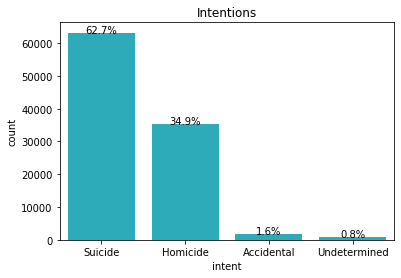

In [4]:
sb.countplot(data = df,x = df["intent"], order = df.intent.value_counts().index, color=color);
for i in range(len(df.intent.value_counts())):
    ratio = df.intent.value_counts()[i] * 100 / df.intent.value_counts().sum()
    plt.text(y = df.intent.value_counts()[i], x = i, s ="{:0.1f}%".format(ratio), ha = 'center')
    
plt.title("Intentions");

**It's obvious that sucide intention is the highest and Homicide comes second**

In [7]:
men_ration = df.sex.value_counts()[0] * 100 / df.sex.value_counts().sum() 
women_ration = df.sex.value_counts()[1] * 100 / df.sex.value_counts().sum() 

Text(1, 9449, '14.3%')

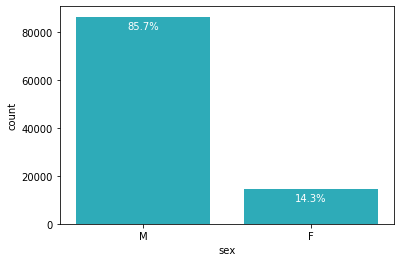

In [8]:
sb.countplot(data = df,x = df["sex"], order = df.sex.value_counts().index, color=color);
locs, labels = plt.xticks()

plt.text(locs[0], y = (df.sex.value_counts()[0] - 5000), s ="{:0.1f}%".format(men_ration), ha = 'center', color = 'w')
plt.text(locs[1], y = (df.sex.value_counts()[1] - 5000), s ="{:0.1f}%".format(women_ration), ha = 'center', color = 'w')

**i found these facts as i surfed the internet**<br>
<i>Women are even more likely than men to attempt suicide. In the US for example, adult women in the US reported a suicide attempt 1.2 times as often as men. But male suicide methods are often more violent, making them more likely to be completed before anyone can intervene.<i><br>
**Source:** https://www.bbc.com/future/article/20190313-why-more-men-kill-themselves-than-women


In [35]:
sub_age.describe()

count    100747.000000
mean         43.871966
std          19.483206
min           1.000000
25%          27.000000
50%          42.000000
75%          58.000000
max         107.000000
Name: age, dtype: float64

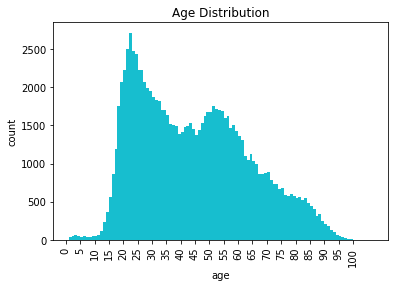

In [10]:
# zero age is just a missing data so i will exclude it
sub_age = df[df["age"] > 0]["age"]

bins = np.arange(1,107+1,1)

# plotting
plt.hist(sub_age,bins=bins,color=color);
plt.title("Age Distribution");
plt.xlabel("age")
plt.ylabel("count");
x_ticks = [i for i in range(0,101,5)]
plt.xticks(x_ticks,x_ticks,rotation='vertical');

**It's bimodal distribution starts to increase from 15 then decrease until 50 then decrease again**

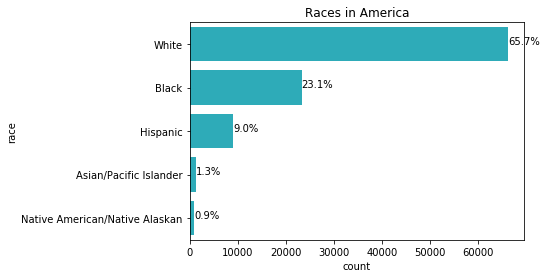

In [6]:
sb.countplot(data=df, y = "race", order = df.race.value_counts().index,color=color);

for i in range(len(df.race.value_counts())):
    pct_string = df.race.value_counts()[i] * 100 / df.race.value_counts().sum()
    plt.text(df.race.value_counts()[i],i,"{:0.1f}%".format(pct_string))
plt.title("Races in America");

**white race is the mjority in america so it's reflicted on our dataset**

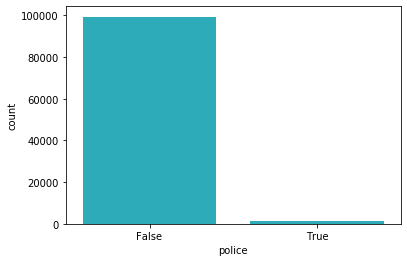

In [12]:
sb.countplot(data=df, x = "police", order = df.police.value_counts().index,color=color);

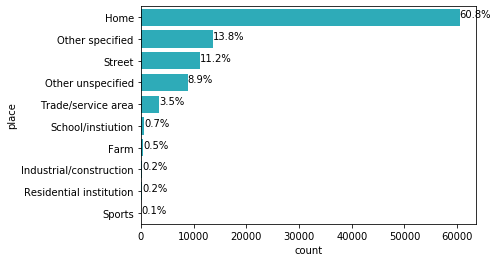

In [13]:
sb.countplot(data=df, y = "place", order = df.place.value_counts().index,color=color);

for i in range(len(df.place.value_counts())):
    pct_string = df.place.value_counts()[i] * 100 / df.place.value_counts().sum()
    plt.text(df.place.value_counts()[i],i,"{:0.1f}%".format(pct_string))

<i>this shows the places where abnormal death can happen which can help us take a steps towards solving the problem<i>

Text(0.5, 1.0, 'education vs death')

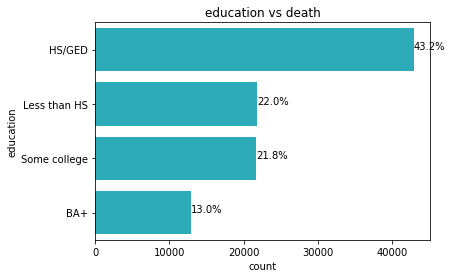

In [85]:
sb.countplot(data=df, y = "education", order = df.education.value_counts().index,color=color);

for i in range(len(df.education.value_counts())):
    pct_string = df.education.value_counts()[i] * 100 / df.education.value_counts().sum()
    plt.text(df.education.value_counts()[i],i,"{:0.1f}%".format(pct_string))
plt.title("education vs death")

<i>people with high school degrees are more valunrable to abnormal death<i>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> distribution of age is bimodal, i did not need to perform a distribution as i was exploring just on variable.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> male and female death ratio was very biased but i answered why this ratio exists, however the relations were obvious and  straight

## Bivariate Exploration



In [6]:
# set up the data
df_date_sep = df.date.apply(lambda x: x.split(" "))
month = df_date_sep.apply(lambda x: x[0])
year = df_date_sep.apply(lambda x: x[1])

ref = df.date.value_counts()
death_time = pd.DataFrame(columns = year.unique(),index = month.unique())

# fill pivot data frame with it's correspondent 
for year_piv in death_time.columns:
    for month_piv in death_time.index:
        for k_ref in ref.keys():
            month_ref = re.findall("[a-zA-Z]+",k_ref)
            year_ref = re.findall("[0-9]+",k_ref)
            if month_piv == str(month_ref[0]) and  year_piv == str(year_ref[0]):
                death_time.loc[month_piv, year_piv] = ref[k_ref]
                break
death_time

,2012,2013,2014
Jan,2758,2864,2651
Feb,2357,2375,2361
Mar,2743,2862,2684
Apr,2795,2798,2862
May,2999,2806,2864
Jun,2826,2920,2931
July,3026,3079,2884
Aug,2954,2859,2970
Sep,2852,2742,2914
Oct,2733,2808,2865


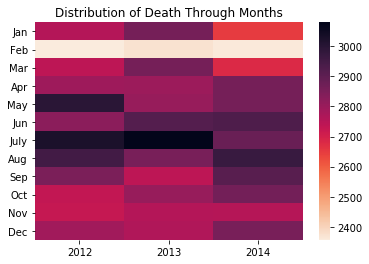

In [7]:
# plot         
death_time = death_time.astype(int)
sb.heatmap(data = death_time,cmap="rocket_r");
plt.title("Distribution of Death Through Months");

<i>This Heat map allow us to see the seasonality of abnormal death, it's obvious that the concentration is at the spring and start of the summer, There is a weird observation that February has very low number of deaths that needs further investgations with dataset that havee more years
<i>

In [6]:
# set up the data
df_sucide = df.query("intent == 'Suicide'")
df_date_sep = df_sucide.date.apply(lambda x: x.split(" "))
month = df_date_sep.apply(lambda x: x[0])
year = df_date_sep.apply(lambda x: x[1])

ref = df_sucide.date.value_counts()
suicide_through_time = pd.DataFrame(columns = year.unique(),index = month.unique())

# fill pivot data frame with it's correspondent 
for year_piv in suicide_through_time.columns:
    for month_piv in suicide_through_time.index:
        for k_ref in ref.keys():
            month_ref = re.findall("[a-zA-Z]+",k_ref)
            year_ref = re.findall("[0-9]+",k_ref)
            if month_piv == str(month_ref[0]) and  year_piv == str(year_ref[0]):
                suicide_through_time.loc[month_piv, year_piv] = ref[k_ref]
                break
                
suicide_through_time

,2012,2013,2014
Jan,1707,1797,1716
Feb,1549,1592,1591
Mar,1707,1870,1732
Apr,1745,1819,1874
May,1932,1791,1783
Jun,1724,1797,1846
July,1789,1893,1832
Aug,1796,1786,1839
Sep,1717,1728,1898
Oct,1696,1741,1819


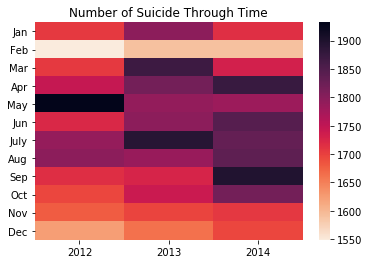

In [7]:
# plot
suicide_through_time = suicide_through_time.astype(int)
sb.heatmap(data = suicide_through_time,cmap="rocket_r");
plt.title("Number of Suicide Through Time");

<i>Because sucide have the highest portion of the data i decided to show it solo.<i><br>
<i>Research on seasonal effects on suicide rates suggests that the prevalence of suicide is greatest during the late spring and early summer months, despite the common belief that suicide rates peak during the cold and dark months of the winter season.<i><br>
**Source:** https://en.wikipedia.org/wiki/Seasonal_effects_on_suicide_rates#:~:text=3.4%20Psychology-,General%20effects,in%20the%20spring%20and%20summer.

In [10]:
race_lst = df.race.unique()
intent_lst = df.intent.unique()[:-1]
container = dict()

for race in race_lst:
    for intent in intent_lst:
        total = df.query("race == '{}' and intent == '{}'".format(race,intent)).shape[0]
        #print(race,intent)
        container[race + " - " + intent] = total

index = set([re.findall("(.*)\ - ", i)[0] for i in container.keys()])

race_intent = pd.DataFrame(index=index,columns=intent_lst)

for k,v in container.items():
    indx_ref = re.findall("(.*)\ - ", k)[0]
    col_ref = re.findall("\ - (.*)", k)[0]
    for indx_df in race_intent.index:
        for col_df in race_intent.columns:
            if indx_ref == indx_df and col_df == col_ref:
                race_intent.loc[indx_df,col_df] = v
                break
race_intent

,Suicide,Undetermined,Accidental,Homicide
White,55372,585,1132,9147
Asian/Pacific Islander,745,10,12,559
Black,3332,126,328,19510
Hispanic,3171,72,145,5634
Native American/Native Alaskan,555,14,22,326


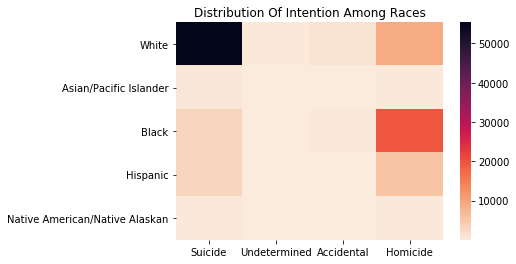

In [11]:
race_intent = race_intent.astype(int)
sb.heatmap(data=race_intent,cmap="rocket_r")
plt.title("Distribution Of Intention Among Races");

<i>This Heat map shows the distribution of intentions among races, we can observe that the most race that suicides is the white race, and black race is the killed<i>

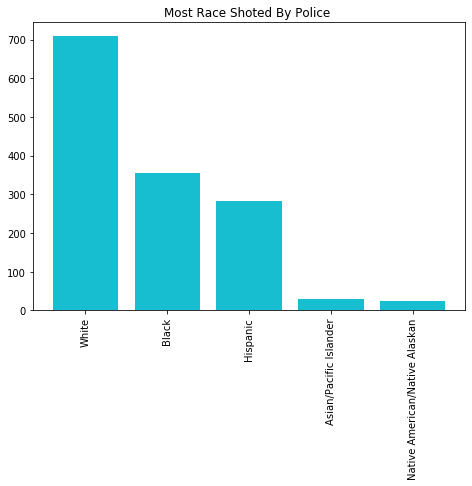

In [12]:
# set data
container = dict()
order=["White","Black",\
        "Hispanic","Asian/Pacific Islander","Native American/Native Alaskan"]

for elm in order:
    container[elm] = df.query("race == '{}'and police == True".format(elm)).shape[0]
    
# plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
race = [i for i in container.keys()]
police = [i for i in container.values()]
ax.bar(race,police,color=color)
plt.xticks(rotation='vertical')
plt.title("Most Race Shoted By Police ");

<i>Yes White race is most shot by police but that not due to racist it's more likely because white race has the highest percentage by 61%, so that needs further investgation so we don't fall into simpson's paradox<i>
**Source:**https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States#:~:text=The%20White%2C%20non%2DHispanic%20or,and%20Latinos)%20being%2077%25.

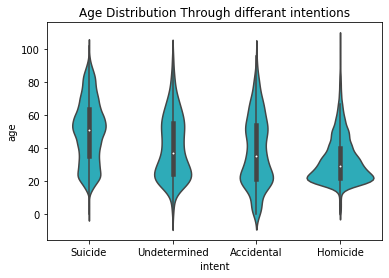

In [13]:
sb.violinplot(data=df,x="intent",y="age",color=color);
plt.title("Age Distribution Through differant intentions");

<i>All categories have bimodal distributions except homicide most of it happens among young people<i>

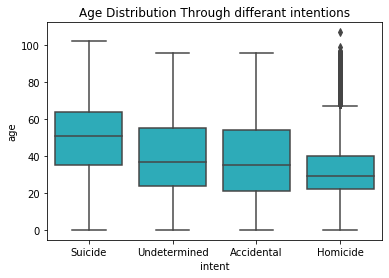

In [34]:
sb.boxplot(data=df,x="intent",y="age",color=color);
plt.title("Age Distribution Through differant intentions");

In [65]:
# death count for every group of age
age_death = df.age.value_counts().to_frame()

age_death.reset_index(level=0, inplace=True)
age_death.rename(columns={"index":"age","age":"death_count"},inplace=True)

age_death

,age,death_count
0,22,2712
1,21,2504
2,23,2472
3,24,2437
4,26,2231
...,...,...
99,99,6
100,101,2
101,102,2
102,100,1


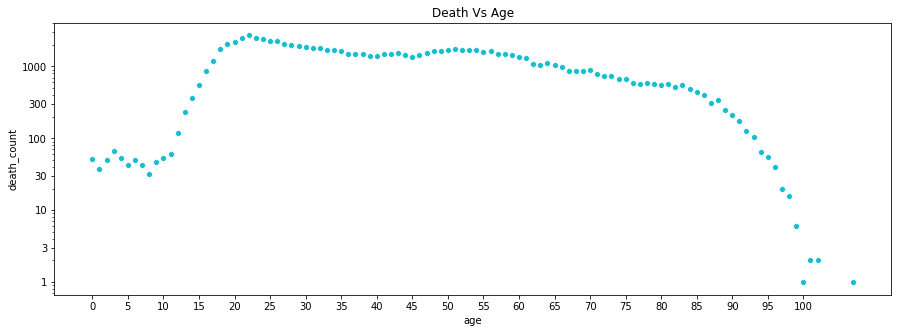

In [86]:
# Plotting
sb.scatterplot(data=age_death,x="age",y="death_count",color=color)

plt.yscale("log")

x_ticks=[i for i in range(0,101,5)]
plt.xticks(x_ticks,x_ticks);

y_ticks=[1,3,10,30,100,300,1000]
plt.yticks(y_ticks,y_ticks);

plt.title("Death Vs Age");

<i>Here we can see the trend clearer it reaches the peak at 22 then starts to fall gradualley<i>

In [4]:
# lsit of the
sucide_age = df.query("intent == 'Suicide'")["age"].value_counts().to_frame()
sucide_age.reset_index(level=0,inplace=True)
sucide_age.rename(columns={"index":"age", "age":"death_count"},inplace=True)
sucide_age

,age,death_count
0,54,1390
1,53,1376
2,56,1343
3,51,1338
4,52,1334
...,...,...
90,10,3
91,101,2
92,102,2
93,9,2


Text(0.5, 1.0, 'Suicide age distribution')

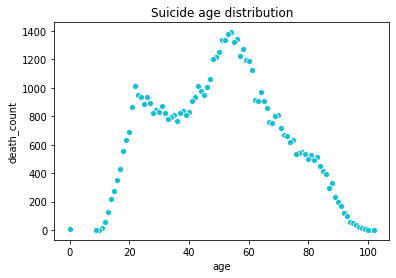

In [5]:
# Plotting
sb.scatterplot(data=sucide_age,x="age",y="death_count",color=color)
plt.title("Suicide age distribution")

<i>suicide trend among age it reaches the peak at 54 then it takes to fall<i>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - death numbers in febrauary are very small among all the years.
- White race is the most shoted by police but this may due to that they have the higher percentage between american people
- Homicide is mostly commited among young people
- Suicide increases at spring
- Hieghst age velunrable to sicide is 54
- Highest Age velnurable to abnormal death whether sucide accedent or homicide is 22


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> not much 

## Multivariate Exploration


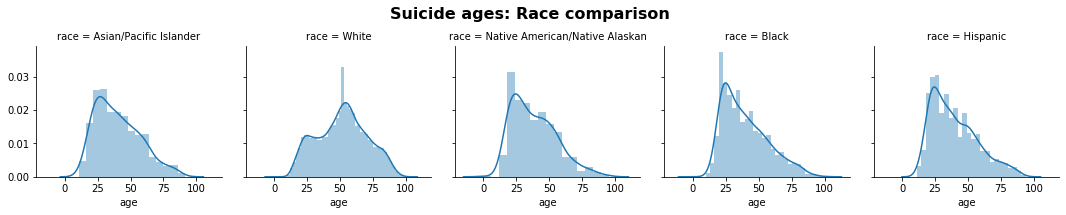

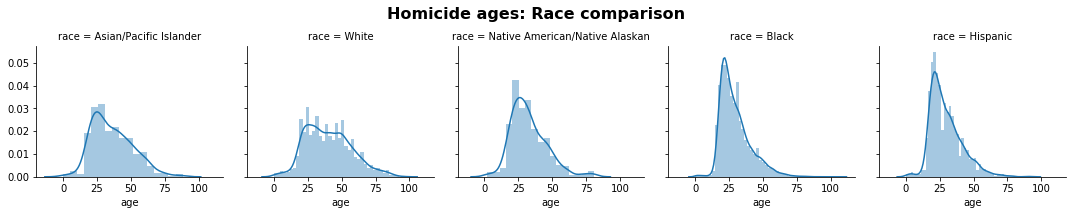

In [32]:
# get the same order for both grids for better comparison:
order = df.race.unique()

df_sub = df.copy()

df_sub['race'] = df['race'].astype('category')
df_sub.race.cat.set_categories(order, inplace=True)

suicide = df_sub.query("intent == 'Suicide'")
homicide = df_sub.query("intent == 'Homicide'")

# plotting
a = sb.FacetGrid(data=suicide,col="race")
a.map(sb.distplot, "age")
a.fig.suptitle('Suicide ages: Race comparison', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.8)


b = sb.FacetGrid(data=homicide,col="race")
b.map(sb.distplot, "age")
b.fig.suptitle('Homicide ages: Race comparison', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.8)

*In both Homicide and suicide, white race density is arround 55, while other races density is arround 20 then it takes falling*

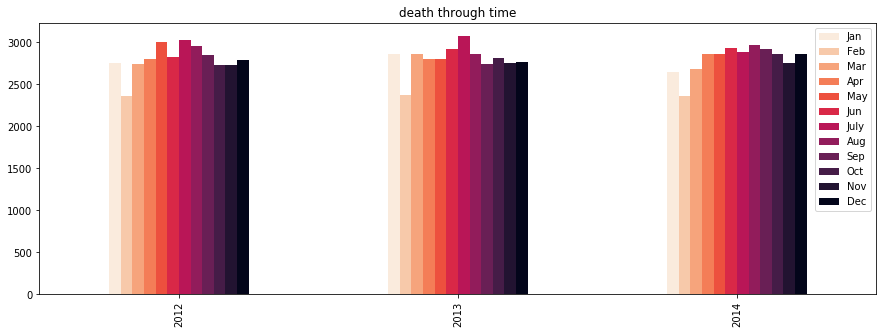

In [14]:
plt.rcParams["figure.figsize"] = [15, 5]


cmaap = cm.get_cmap("rocket_r")

death_time.T.plot(kind="bar",cmap=cmaap);
plt.title("death through time");

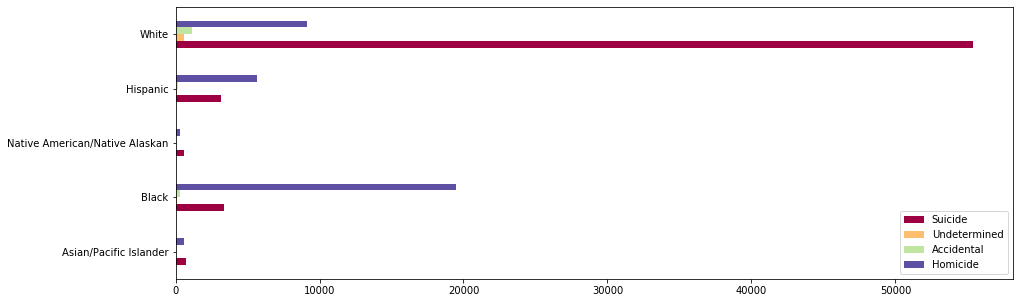

In [271]:
race_intent.plot(kind="barh",cmap=cmap);

<i>Highest Sucide is in the white race, highest homicide is in black race<i>

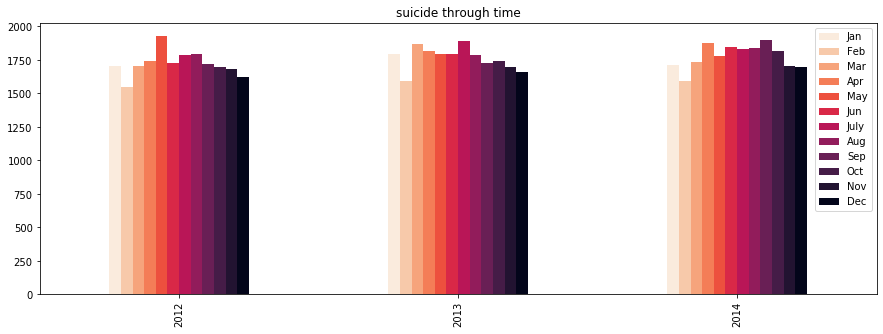

In [12]:
suicide_through_time.T.plot(kind="bar",cmap=cmaap)
plt.title("suicide through time");

<i>we can observe the spikes and data is concentrated at the middle which means the spring and start of summer
    <i>

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> These plots ensures the same relations that we observed in the last section but with broder way of presentation,
However In both Homicide and Suicide, white race density is arround 55, while other races density is arround 20 then it takes falling.

### Were there any interesting or surprising interactions between features?

> white race is known that is the majority in america and is less exposed to bullying and other abuses that may happen more to minor races however graphs says white race is the most suicidal, please **note our limitation** here that we study just the data of America where white race is 61% of their people, so if we have data for Africa or for latin countries we may have other results, so we can not decide for know that the white race is the most Sucidal race,\
the second thing that all races denisty curves are close to each others as it raise at 20 and takes decreasing but white race peak at arround 55.